In [1]:
import pandas as pd
import numpy as np
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import ngrams
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

# All

In [2]:
all = pd.read_excel('ARMS_Reviews.xlsx')
all.head(10)

,Source,Date,Review
0,FB Page,2020-07-09 00:00:00,The assistance service is completely useless! ...
1,FB Page,2020-07-09 00:00:00,Many thanks to Deborah. She helped us to solve...
2,FB Page,16/05/2020,Absolutely horrific process to apply for a new...
3,FB Page,2020-07-04 00:00:00,Saying that AMRS is an incompetent is an under...
4,FB Page,18/03/2020,There is a very helpful team ready to reply an...
5,FB Page,29/01/2020,"so from January 2019 till November 2019, I got..."
6,FB Page,25/11/2019,"Always do we read about bad stuff on ARMS, but..."
7,FB Page,30/09/2019,"Nothing. A total disgrace, nobody knows what's..."
8,FB Page,2019-03-12 00:00:00,SHAME ON YOU! I have received nearly €200 extr...
9,FB Page,2019-03-12 00:00:00,ARMS your system is crab. I've benn hearing th...


In [3]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/Owner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Owner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
reviews = " ".join(all['Review'])
words = word_tokenize(reviews)

In [5]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [6]:
lowered = clean_words(words)

In [7]:
bow = Counter(lowered)

In [8]:
data = pd.DataFrame(bow.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

In [9]:
data = data.head(20)

<AxesSubplot:xlabel='frequency', ylabel='word'>

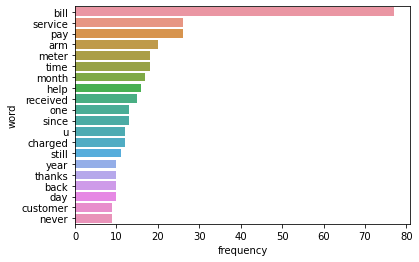

In [10]:
sns.barplot(x='frequency',y='word',data=data)

In [11]:
bow2 = Counter(ngrams(lowered,2))
#bow2

In [12]:
def word_frequency(sentence):
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

In [28]:
data2,data3,data4 = word_frequency(all['Review'])

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

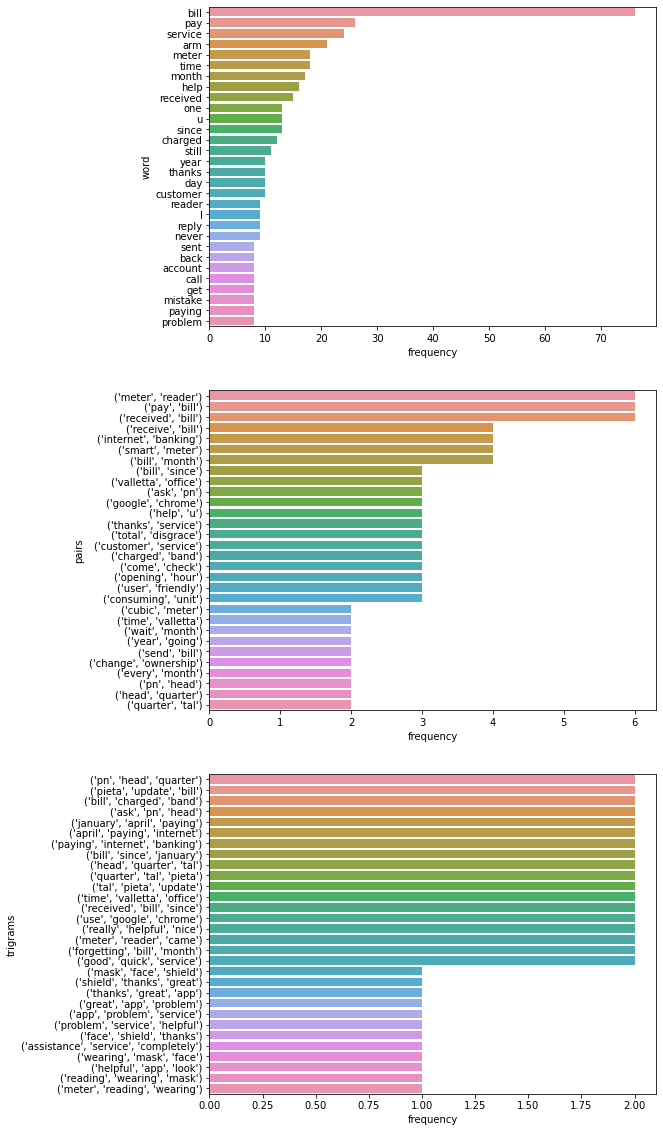

In [29]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))